In [ ]:
# predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import tensorflow as tf

# from keras.models import Sequential
# from keras.layers import Dense, Dropout

In [3]:
# spliting the data
from sklearn.model_selection import GridSearchCV,KFold,train_test_split

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

In [5]:
turbine = pd.read_csv('gas_turbines.csv')
turbine.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
# we want to predict TEY
turbine_output = turbine['TEY'] 

turbine.drop('TEY',axis=1,inplace=True)

In [7]:
turbine.head(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.0,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.0,10.598,3.2363,82.776


In [8]:
turbine.insert(10,'TEY',turbine_output)

In [9]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
turbine.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

<AxesSubplot:>

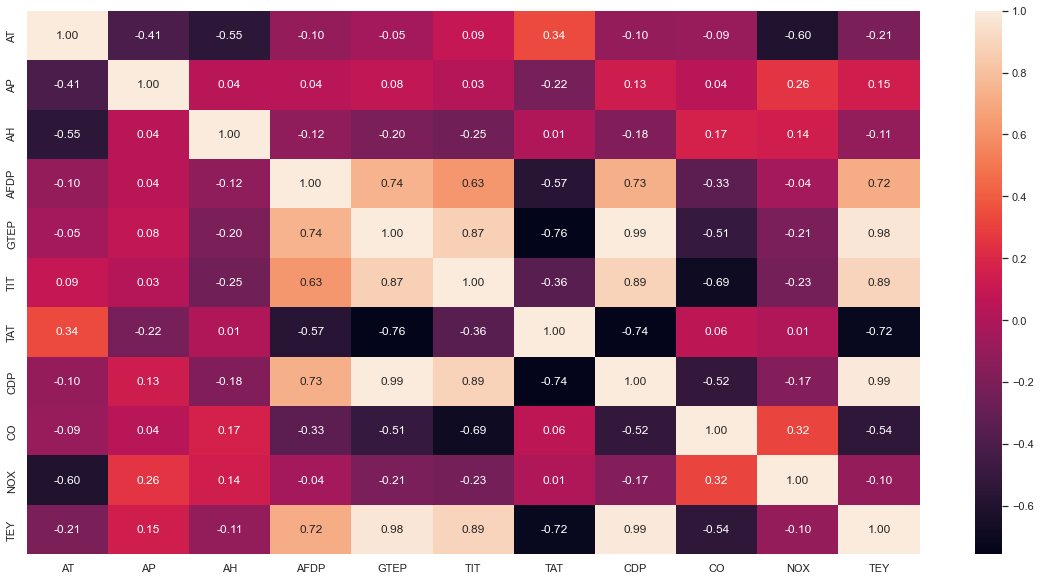

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(turbine.corr(),annot=True,fmt='.2f')

In [12]:
turbine[turbine.duplicated()].shape

(0, 11)

## Feature Selection by using Mutual Information Feature Selection

In [13]:
x = turbine.iloc[:,0:-1]
y = turbine.iloc[:,-1]

In [14]:
# relevent imp feature selection

def select_features(X_train,y_train,X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func = mutual_info_regression,k='all')
    
    # learn relationship from training data
    fs.fit(X_train,y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs,fs

In [15]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [16]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [17]:
fs.scores_

array([0.41037982, 0.15123404, 0.09028568, 0.65454029, 1.58547154,
       1.30600571, 0.91185311, 1.70941629, 0.50682155, 0.30174079])

In [18]:
for i in range(len(fs.scores_)):
    print(f'Feature {i} wtg = {np.round(fs.scores_[i],4)} ')

Feature 0 wtg = 0.4104 
Feature 1 wtg = 0.1512 
Feature 2 wtg = 0.0903 
Feature 3 wtg = 0.6545 
Feature 4 wtg = 1.5855 
Feature 5 wtg = 1.306 
Feature 6 wtg = 0.9119 
Feature 7 wtg = 1.7094 
Feature 8 wtg = 0.5068 
Feature 9 wtg = 0.3017 


<BarContainer object of 10 artists>

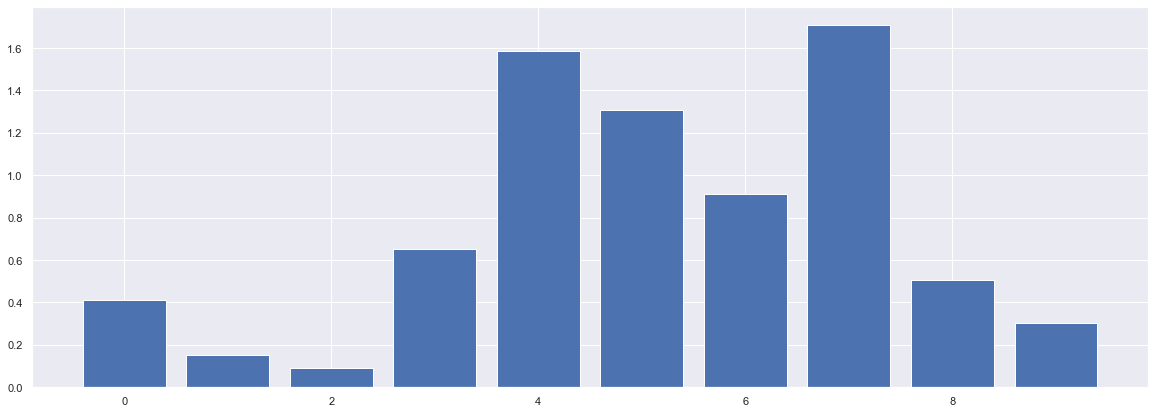

In [19]:
# plot the scores

plt.figure(figsize=(20,7))

plt.bar([i for i in range(len(fs.scores_))],fs.scores_)

In [20]:
turbine.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX',
       'TEY'],
      dtype='object')

In [ ]:
# imp features for calculations - 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP'

In [21]:
X_new = turbine.iloc[:,3:8]

In [22]:
X_new.head()

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612


In [23]:
X_new.shape

(15039, 5)

In [24]:
y.shape

(15039,)

## Artificial Neural Network Model - Backpropagation

In [25]:
# model form
model_fs1 = tf.keras.models.Sequential()
    
# adding layer
model_fs1.add(tf.keras.layers.Dense(10,input_dim =5,activation = 'relu'))
model_fs1.add(tf.keras.layers.Dense(6,activation='relu'))
model_fs1.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_fs1.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
Hist_fs1 = model_fs1.fit(X_new,y,validation_split=0.2,epochs=100,batch_size = 200)

Epoch 1/100
61/61 [==============================] - 0s 3ms/step - loss: 2080.3845 - accuracy: 0.0000e+00 - val_loss: 2027.7175 - val_accuracy: 0.0000e+00
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 2080.3840 - accuracy: 0.0000e+00 - val_loss: 2027.7175 - val_accuracy: 0.0000e+00
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 2080.3843 - accuracy: 0.0000e+00 - val_loss: 2027.7175 - val_accuracy: 0.0000e+00
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 2080.3843 - accuracy: 0.0000e+00 - val_loss: 2027.7175 - val_accuracy: 0.0000e+00
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 2080.3843 - accuracy: 0.0000e+00 - val_loss: 2027.7175 - val_accuracy: 0.0000e+00
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 2080.3843 - accuracy: 0.0000e+00 - val_loss: 2027.7175 - val_accuracy: 0.0000e+00
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - los

In [26]:
# model form
model_fs2 = tf.keras.models.Sequential()
    
# adding layer
model_fs2.add(tf.keras.layers.Dense(10,input_dim =5,activation = 'tanh'))
model_fs2.add(tf.keras.layers.Dense(6,activation='tanh'))
model_fs2.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_fs2.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_fs2 = model_fs2.fit(X_new,y,validation_split=0.2,epochs=100,batch_size = 200)

Epoch 1/100
61/61 [==============================] - 0s 3ms/step - loss: 17846.8555 - mse: 17846.8555 - val_loss: 16832.7070 - val_mse: 16832.7070
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 17617.6602 - mse: 17617.6602 - val_loss: 16613.7988 - val_mse: 16613.7988
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 17400.8418 - mse: 17400.8418 - val_loss: 16429.8145 - val_mse: 16429.8145
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 17241.1602 - mse: 17241.1621 - val_loss: 16293.9932 - val_mse: 16293.9932
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 17109.1191 - mse: 17109.1191 - val_loss: 16170.7363 - val_mse: 16170.7363
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 16985.5273 - mse: 16985.5293 - val_loss: 16052.9424 - val_mse: 16052.9424
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 16866.2754 - mse: 16866.2754 - val_loss: 1593

In [27]:
# model form
model_fs3 = tf.keras.models.Sequential()
    
# adding layer
model_fs3.add(tf.keras.layers.Dense(10,input_dim =5,activation = 'linear'))
model_fs3.add(tf.keras.layers.Dense(6,activation='linear'))
model_fs3.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_fs3.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_fs3 = model_fs3.fit(X_new,y,validation_split=0.2,epochs=100,batch_size = 100)

Epoch 1/100
121/121 [==============================] - 0s 2ms/step - loss: 528557.5000 - mse: 528557.5000 - val_loss: 186.2141 - val_mse: 186.2141
Epoch 2/100
121/121 [==============================] - 0s 1ms/step - loss: 59.7291 - mse: 59.7291 - val_loss: 47.4877 - val_mse: 47.4877
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 47.7158 - mse: 47.7158 - val_loss: 47.7669 - val_mse: 47.7669
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 47.4897 - mse: 47.4897 - val_loss: 47.1364 - val_mse: 47.1364
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 47.2129 - mse: 47.2129 - val_loss: 47.4294 - val_mse: 47.4294
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 46.8612 - mse: 46.8612 - val_loss: 46.2719 - val_mse: 46.2719
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 46.5068 - mse: 46.5068 - val_loss: 45.9903 - val_mse: 45.9903
Epoch 8/100
121/121 [==========

In [28]:
# model form
model_fs4 = tf.keras.models.Sequential()
    
# adding layer
model_fs4.add(tf.keras.layers.Dense(10,input_dim =5,activation = 'relu'))
model_fs4.add(tf.keras.layers.Dense(6,activation='relu'))
model_fs4.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_fs4.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_fs4 = model_fs4.fit(X_new,y,validation_split=0.2,epochs=100,batch_size = 100)

Epoch 1/100
121/121 [==============================] - 1s 2ms/step - loss: 24629.2227 - mse: 24629.2227 - val_loss: 17501.7480 - val_mse: 17501.7461
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 18396.4492 - mse: 18396.4492 - val_loss: 17472.8887 - val_mse: 17472.8887
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 18366.1602 - mse: 18366.1602 - val_loss: 17442.9082 - val_mse: 17442.9082
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 18335.0879 - mse: 18335.0879 - val_loss: 17412.4277 - val_mse: 17412.4277
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 18303.6426 - mse: 18303.6406 - val_loss: 17381.6602 - val_mse: 17381.6602
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 18271.9824 - mse: 18271.9824 - val_loss: 17350.7305 - val_mse: 17350.7305
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 18240.1953 - mse: 18240.1973 - 

Epoch 56/100
121/121 [==============================] - 0s 2ms/step - loss: 16697.6270 - mse: 16697.6250 - val_loss: 15817.8271 - val_mse: 15817.8271
Epoch 57/100
121/121 [==============================] - 0s 2ms/step - loss: 16666.8379 - mse: 16666.8379 - val_loss: 15787.8818 - val_mse: 15787.8818
Epoch 58/100
121/121 [==============================] - 0s 2ms/step - loss: 16636.0801 - mse: 16636.0801 - val_loss: 15757.9561 - val_mse: 15757.9561
Epoch 59/100
121/121 [==============================] - 0s 2ms/step - loss: 16605.3555 - mse: 16605.3555 - val_loss: 15728.0576 - val_mse: 15728.0576
Epoch 60/100
121/121 [==============================] - 0s 2ms/step - loss: 16574.6543 - mse: 16574.6543 - val_loss: 15698.2061 - val_mse: 15698.2061
Epoch 61/100
121/121 [==============================] - 0s 2ms/step - loss: 16543.9941 - mse: 16543.9941 - val_loss: 15668.3682 - val_mse: 15668.3682
Epoch 62/100
121/121 [==============================] - 0s 2ms/step - loss: 16513.3516 - mse: 16513.

In [29]:
model_fs4.evaluate(X_new,y)

470/470 [==============================] - 1s 1ms/step - loss: 15189.9990 - mse: 15189.9990


[15189.9990234375, 15189.9990234375]

In [30]:
# model form
model_fs5 = tf.keras.models.Sequential()
    
# adding layer
model_fs5.add(tf.keras.layers.Dense(10,input_dim =5,activation = 'relu'))
model_fs5.add(tf.keras.layers.Dense(6,activation='relu'))
model_fs5.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_fs5.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_fs5 = model_fs5.fit(X_new,y,validation_split=0.2,epochs=100,batch_size = 50)

Epoch 1/100
241/241 [==============================] - 1s 2ms/step - loss: 26471.0000 - mse: 26471.0000 - val_loss: 181.1743 - val_mse: 181.1743
Epoch 2/100
241/241 [==============================] - 0s 2ms/step - loss: 182.1206 - mse: 182.1206 - val_loss: 185.1215 - val_mse: 185.1215
Epoch 3/100
241/241 [==============================] - 0s 2ms/step - loss: 181.2095 - mse: 181.2095 - val_loss: 185.3171 - val_mse: 185.3171
Epoch 4/100
241/241 [==============================] - 0s 2ms/step - loss: 180.2837 - mse: 180.2837 - val_loss: 179.7302 - val_mse: 179.7302
Epoch 5/100
241/241 [==============================] - 0s 2ms/step - loss: 178.7136 - mse: 178.7136 - val_loss: 179.7262 - val_mse: 179.7262
Epoch 6/100
241/241 [==============================] - 0s 2ms/step - loss: 177.0766 - mse: 177.0766 - val_loss: 176.5780 - val_mse: 176.5780
Epoch 7/100
241/241 [==============================] - 0s 2ms/step - loss: 174.9381 - mse: 174.9381 - val_loss: 177.7784 - val_mse: 177.7784
Epoch 8/1

Epoch 61/100
241/241 [==============================] - 0s 2ms/step - loss: 8.1231 - mse: 8.1231 - val_loss: 8.2550 - val_mse: 8.2550
Epoch 62/100
241/241 [==============================] - 0s 2ms/step - loss: 7.9219 - mse: 7.9219 - val_loss: 8.1046 - val_mse: 8.1046
Epoch 63/100
241/241 [==============================] - 0s 2ms/step - loss: 8.0021 - mse: 8.0021 - val_loss: 7.9020 - val_mse: 7.9020
Epoch 64/100
241/241 [==============================] - 0s 2ms/step - loss: 7.8778 - mse: 7.8778 - val_loss: 7.8146 - val_mse: 7.8146
Epoch 65/100
241/241 [==============================] - 0s 2ms/step - loss: 7.9780 - mse: 7.9780 - val_loss: 7.7520 - val_mse: 7.7520
Epoch 66/100
241/241 [==============================] - 0s 2ms/step - loss: 7.8412 - mse: 7.8412 - val_loss: 7.8407 - val_mse: 7.8407
Epoch 67/100
241/241 [==============================] - 0s 2ms/step - loss: 7.8886 - mse: 7.8886 - val_loss: 8.0825 - val_mse: 8.0825
Epoch 68/100
241/241 [==============================] - 0s 2ms

In [31]:
score_5 = model_fs5.evaluate(X_new,y)

470/470 [==============================] - 0s 988us/step - loss: 8.0769 - mse: 8.0769


In [32]:
print(f'Loss is {score_5[0]}')
print(f'Mean Squared Error is {score_5[1]}')

Loss is 8.07692813873291
Mean Squared Error is 8.07692813873291


### Normalizing data after

In [33]:
turbine_new = turbine.drop(['AT', 'AP', 'AH','CO', 'NOX'],axis=1)

In [34]:
turbine_new.head()

,AFDP,GTEP,TIT,TAT,CDP,TEY
0,3.5000,19.663,1059.2,550.00,10.605,114.70
1,3.4998,19.728,1059.3,550.00,10.598,114.72
2,3.4824,19.779,1059.4,549.87,10.601,114.71
3,3.4805,19.792,1059.6,549.99,10.606,114.72
4,3.4976,19.765,1059.7,549.98,10.612,114.72


In [37]:
arr = turbine_new
scaler = StandardScaler().fit(arr)
std_turbine_fs  = scaler.transform(arr)

In [38]:
std_turbine_fs

array([[-0.92123188, -1.37910125, -1.48837592,  0.58524028, -1.35733078,
        -1.23117246],
       [-0.92149498, -1.36352783, -1.4823253 ,  0.58524028, -1.36367619,
        -1.22990897],
       [-0.94438456, -1.35130868, -1.47627469,  0.56871459, -1.36095673,
        -1.23054071],
       ...,
       [-0.95148822, -1.41096688, -2.78925732, -1.02664984, -1.46792219,
        -1.5160891 ],
       [-0.98884822, -1.44762432, -2.4564737 , -0.52833681, -1.42259784,
        -1.48134317],
       [-1.01660512, -1.46463529, -2.05108275,  0.05768949, -1.37727349,
        -1.42827666]])

In [39]:
X_std = std_turbine_fs[:,0:-1]
Y_std = std_turbine_fs[:,-1]

In [40]:
# model form
model_fs6 = tf.keras.models.Sequential()
    
# adding layer
model_fs6.add(tf.keras.layers.Dense(10,input_dim =5,activation = 'relu'))
model_fs6.add(tf.keras.layers.Dense(6,activation='relu'))
model_fs6.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_fs6.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_fs6 = model_fs6.fit(X_std,Y_std,validation_split=0.2,epochs=100,batch_size = 50)

Epoch 1/100
241/241 [==============================] - 1s 2ms/step - loss: 0.1712 - mse: 0.1712 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 2/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 3/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 4/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 5/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 6/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 7/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 8/100
241/241 [==============================] - 0s 2ms/step - 

In [41]:
score_6 = model_fs6.evaluate(X_std,Y_std)

470/470 [==============================] - 0s 478us/step - loss: 0.0069 - mse: 0.0069


In [42]:
print(f'Loss is {score_6[0]}')
print(f'Mean Squared Error is {score_6[1]}')

Loss is 0.006944782100617886
Mean Squared Error is 0.006944782100617886


## Without Feature Selection

### Normalizing

In [43]:
array = turbine.values

scaler = StandardScaler().fit(array)

std_turbine = scaler.transform(array)

In [44]:
std_turbine

array([[-1.4397781 , -0.82664395,  1.28143632, ...,  0.53201195,
         1.3878449 , -1.23117246],
       [-1.44960109, -0.74864748,  1.30456402, ...,  0.56873344,
         1.39300237, -1.22990897],
       [-1.43472138, -0.68625031,  1.21908576, ...,  0.5529378 ,
         1.36358566, -1.23054071],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ...,  2.69592467,
         2.17006209, -1.5160891 ],
       [-1.42042259, -0.99823616,  1.44159024, ...,  1.9246834 ,
         2.391165  , -1.48134317],
       [-1.43073409, -0.93583899,  1.33465179, ...,  1.35415028,
         2.32153907, -1.42827666]])

In [45]:
X = std_turbine[:,0:-1]
Y = std_turbine[:,-1]

In [46]:
# model form
model = tf.keras.models.Sequential()
    
# adding layer
model.add(tf.keras.layers.Dense(15,input_dim =10,activation = 'sigmoid',kernel_initializer='normal'))
model.add(tf.keras.layers.Dense(8,activation='sigmoid',kernel_initializer='normal'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss= 'binary_crossentropy',optimizer = adam, metrics=['accuracy'])

Hist = model.fit(X,Y,validation_split=0.2,epochs=100,batch_size=100)

Epoch 1/100
121/121 [==============================] - 0s 2ms/step - loss: -0.9970 - accuracy: 0.0000e+00 - val_loss: -4.0676 - val_accuracy: 0.0000e+00
Epoch 2/100
121/121 [==============================] - 0s 1ms/step - loss: -4.5278 - accuracy: 0.0000e+00 - val_loss: -8.9843 - val_accuracy: 0.0000e+00
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: -8.0051 - accuracy: 0.0000e+00 - val_loss: -13.6302 - val_accuracy: 0.0000e+00
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: -11.2139 - accuracy: 0.0000e+00 - val_loss: -18.0378 - val_accuracy: 0.0000e+00
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: -14.3033 - accuracy: 0.0000e+00 - val_loss: -22.3285 - val_accuracy: 0.0000e+00
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: -17.3091 - accuracy: 0.0000e+00 - val_loss: -26.4886 - val_accuracy: 0.0000e+00
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 

In [47]:
cal_score = model.evaluate(X,Y)

470/470 [==============================] - 1s 1ms/step - loss: -307.9983 - accuracy: 0.0000e+00


In [48]:
print(f'The loss is = {cal_score[0]}')
print(f'The accuracy is = {cal_score[1]}')

The loss is = -307.998291015625
The accuracy is = 0.0


In [53]:
# model form
model_2 = tf.keras.models.Sequential()
    
# adding layer
model_2.add(tf.keras.layers.Dense(15,input_dim =10,activation = 'relu'))
model_2.add(tf.keras.layers.Dense(8,activation='relu'))
model_2.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_2.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
Hist_2 = model_2.fit(X,Y,validation_split=0.2,epochs=100,batch_size = 100)

Epoch 1/100
121/121 [==============================] - 0s 2ms/step - loss: -2.0106 - accuracy: 0.0000e+00 - val_loss: -6.8962 - val_accuracy: 0.0000e+00
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: -6.1398 - accuracy: 0.0000e+00 - val_loss: -7.9655 - val_accuracy: 0.0000e+00
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: -6.5438 - accuracy: 0.0000e+00 - val_loss: -7.9856 - val_accuracy: 0.0000e+00
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: -6.5679 - accuracy: 0.0000e+00 - val_loss: -8.0131 - val_accuracy: 0.0000e+00
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: -6.5903 - accuracy: 0.0000e+00 - val_loss: -8.0214 - val_accuracy: 0.0000e+00
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: -6.5907 - accuracy: 0.0000e+00 - val_loss: -8.0413 - val_accuracy: 0.0000e+00
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: -6.5800

In [50]:
# model form
model_3 = tf.keras.models.Sequential()
    
# adding layer
model_3.add(tf.keras.layers.Dense(15,input_dim =10,activation = 'relu'))
model_3.add(tf.keras.layers.Dense(8,activation='relu'))
model_3.add(tf.keras.layers.Dense(1,activation='linear'))
model_3.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_3 = model_3.fit(X,Y,validation_split = 0.2,epochs=100,batch_size = 100)

Epoch 1/100
121/121 [==============================] - 0s 2ms/step - loss: 17786.9492 - mse: 17786.9492 - val_loss: 15981.3350 - val_mse: 15981.3350
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 14769.7891 - mse: 14769.7891 - val_loss: 10712.8223 - val_mse: 10712.8223
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 8155.0063 - mse: 8155.0063 - val_loss: 4238.9014 - val_mse: 4238.9014
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 3262.5806 - mse: 3262.5806 - val_loss: 1806.6719 - val_mse: 1806.6719
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 1588.4792 - mse: 1588.4792 - val_loss: 1016.5096 - val_mse: 1016.5096
Epoch 6/100
121/121 [==============================] - 0s 969us/step - loss: 915.1077 - mse: 915.1077 - val_loss: 617.4088 - val_mse: 617.4088
Epoch 7/100
121/121 [==============================] - 0s 1ms/step - loss: 594.1105 - mse: 594.1105 - val_loss: 419.8443 - v

121/121 [==============================] - 0s 2ms/step - loss: 1.7981 - mse: 1.7981 - val_loss: 3.7945 - val_mse: 3.7945
Epoch 61/100
121/121 [==============================] - 0s 1ms/step - loss: 1.6582 - mse: 1.6582 - val_loss: 3.4833 - val_mse: 3.4833
Epoch 62/100
121/121 [==============================] - 0s 1ms/step - loss: 1.5130 - mse: 1.5130 - val_loss: 3.2235 - val_mse: 3.2235
Epoch 63/100
121/121 [==============================] - 0s 2ms/step - loss: 1.4037 - mse: 1.4037 - val_loss: 2.9913 - val_mse: 2.9913
Epoch 64/100
121/121 [==============================] - 0s 2ms/step - loss: 1.2824 - mse: 1.2824 - val_loss: 2.7266 - val_mse: 2.7266
Epoch 65/100
121/121 [==============================] - 0s 2ms/step - loss: 1.1927 - mse: 1.1927 - val_loss: 2.5648 - val_mse: 2.5648
Epoch 66/100
121/121 [==============================] - 0s 2ms/step - loss: 1.1076 - mse: 1.1076 - val_loss: 2.3414 - val_mse: 2.3414
Epoch 67/100
121/121 [==============================] - 0s 1ms/step - loss:

In [55]:
cal_score_3 = model_3.evaluate(X,Y)

470/470 [==============================] - 1s 1ms/step - loss: 18205.2617 - mse: 18205.2617


In [56]:
print(f'The loss is = {cal_score_3[0]}')
print(f'The accuracy is = {cal_score_3[1]}')

The loss is = 18205.26171875
The accuracy is = 18205.26171875


### without Normalization

In [58]:
x = turbine.iloc[:,0:-1]
y = turbine.iloc[:,-1]

In [59]:
# model form
model_a = tf.keras.models.Sequential()
    
# adding layer
model_a.add(tf.keras.layers.Dense(15,input_dim =10,activation = 'relu'))
model_a.add(tf.keras.layers.Dense(8,activation='relu'))
model_a.add(tf.keras.layers.Dense(1,activation='linear'))

#compile
model_a.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics=['accuracy'])
Hist_a = model_a.fit(x,y,validation_split=0.2,epochs=100,batch_size = 200)

Epoch 1/100
61/61 [==============================] - 0s 3ms/step - loss: -2041.4366 - accuracy: 0.0000e+00 - val_loss: -1989.3699 - val_accuracy: 0.0000e+00
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: -2041.4370 - accuracy: 0.0000e+00 - val_loss: -1989.3699 - val_accuracy: 0.0000e+00
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: -2041.4364 - accuracy: 0.0000e+00 - val_loss: -1989.3699 - val_accuracy: 0.0000e+00
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: -2041.4371 - accuracy: 0.0000e+00 - val_loss: -1989.3699 - val_accuracy: 0.0000e+00
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: -2041.4370 - accuracy: 0.0000e+00 - val_loss: -1989.3699 - val_accuracy: 0.0000e+00
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: -2041.4370 - accuracy: 0.0000e+00 - val_loss: -1989.3699 - val_accuracy: 0.0000e+00
Epoch 7/100
61/61 [==============================] - 0s 2m

In [60]:
# model form
model_b = tf.keras.models.Sequential()
    
# adding layer
model_b.add(tf.keras.layers.Dense(15,input_dim =10,activation = 'relu'))
model_b.add(tf.keras.layers.Dense(8,activation='relu'))
model_b.add(tf.keras.layers.Dense(1,activation='linear'))
model_b.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse'])
Hist_b = model_b.fit(x,y,validation_split = 0.2,epochs=100,batch_size = 100)

Epoch 1/100
121/121 [==============================] - 0s 2ms/step - loss: 139434.0938 - mse: 139434.0938 - val_loss: 604.8350 - val_mse: 604.8350
Epoch 2/100
121/121 [==============================] - 0s 2ms/step - loss: 264.1216 - mse: 264.1216 - val_loss: 136.7088 - val_mse: 136.7088
Epoch 3/100
121/121 [==============================] - 0s 2ms/step - loss: 149.3094 - mse: 149.3094 - val_loss: 138.0970 - val_mse: 138.0970
Epoch 4/100
121/121 [==============================] - 0s 2ms/step - loss: 147.2980 - mse: 147.2980 - val_loss: 135.7291 - val_mse: 135.7291
Epoch 5/100
121/121 [==============================] - 0s 2ms/step - loss: 146.4037 - mse: 146.4037 - val_loss: 136.6501 - val_mse: 136.6501
Epoch 6/100
121/121 [==============================] - 0s 2ms/step - loss: 145.5970 - mse: 145.5970 - val_loss: 135.5620 - val_mse: 135.5620
Epoch 7/100
121/121 [==============================] - 0s 2ms/step - loss: 144.7262 - mse: 144.7262 - val_loss: 137.3298 - val_mse: 137.3298
Epoch 8

In [61]:
score_b = model_b.evaluate(x,y)

470/470 [==============================] - 1s 2ms/step - loss: 1.3427 - mse: 1.3427
